# PROJECT 2

Name: Musa T GANIYU

School: CUNY SPS

Course: DATA 620 (Web Analytics)


Instruction:

1. Identify and load a network dataset that has some categorical information available for each nodes

2. For each of the nodes in the dataset, calculate degree centrality and eigenvector cetrality.

3. Compare your centrality measures across your catgeorical groups.

Dataset link

https://raw.githubusercontent.com/mascotinme/MSDA_620/master/Nodes_Edges_Airport.txt

* Install and load the following libaries if you have not already done so.

In [3]:
rm(list = ls())
options(warn = -1)
suppressMessages(library(ggraph))
suppressMessages(library(tidygraph))
suppressMessages(library(igraph))
suppressMessages(library(dplyr))
suppressMessages(library(knitr))

A Glimpse at the dataset depicts the following:

* It has 5960 observations and 3 variables(or better still, columns). 
* It has id, from(departing) and to(destination).
* They are all interger data types

In [82]:
airport <- read.csv("https://raw.githubusercontent.com/mascotinme/MSDA_620/master/Nodes_Edges_Airport.txt", sep="",header = TRUE, col.names = c("id", "from", "to"), as.is=TRUE, nrows=1000)

kable(head(airport))
dim(airport)
str(airport)



| id| from|     to|
|--:|----:|------:|
|  1|  111|  68150|
|  1|   49| 110902|
|  1|  283|  72020|
|  1|  177| 220192|
|  1|   72| 164951|
|  1|   56|  22700|

[1] 1000    3

'data.frame':	1000 obs. of  3 variables:
 $ id  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ from: int  111 49 283 177 72 56 48 137 152 51 ...
 $ to  : int  68150 110902 72020 220192 164951 22700 325839 171783 34400 441099 ...


For the graph to be distinctively display, I will reduce the size of the dataset to 100 and compare id with the original dataset. And convert them to igraph table.

In [86]:
samp <- sample_n(airport, 100, replace = TRUE)
df2 <- as_tbl_graph(samp)

df <- as_tbl_graph(airport)
df


# A tbl_graph: 1268 nodes and 1000 edges
#
# A directed acyclic multigraph with 272 components
#
# Node Data: 1,268 x 1 (active)
   name
  <chr>
1   111
2    49
3   283
4   177
5    72
6    56
# ... with 1,262 more rows
#
# Edge Data: 1,000 x 3
   from    to    id
  <int> <int> <int>
1     1   299     1
2     2   300     1
3     3   301     1
# ... with 997 more rows

The above shows that we have 1268 nodes and 1000 edges.

* PLOTS

The plot below shows the connection between the nodes and the edges.

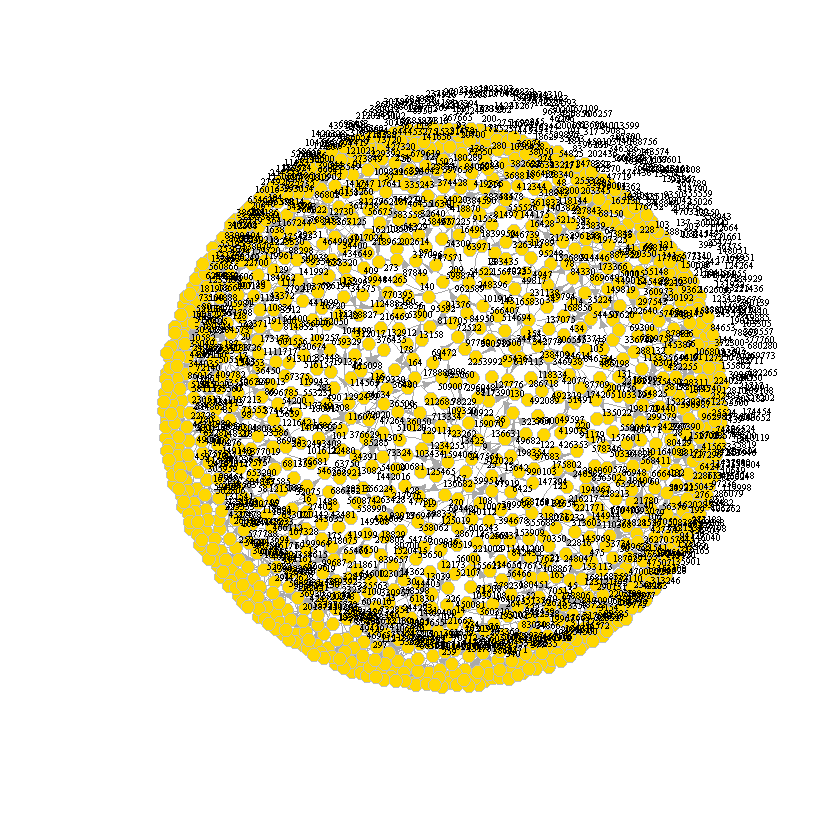

In [87]:
plot(df,edge.arrow.size=.5, vertex.color="gold", vertex.size=5, layout=layout_with_kk,
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=0.5, vertex.label.dist=1, edge.curved=0.2)

A smaller dataset's plot.

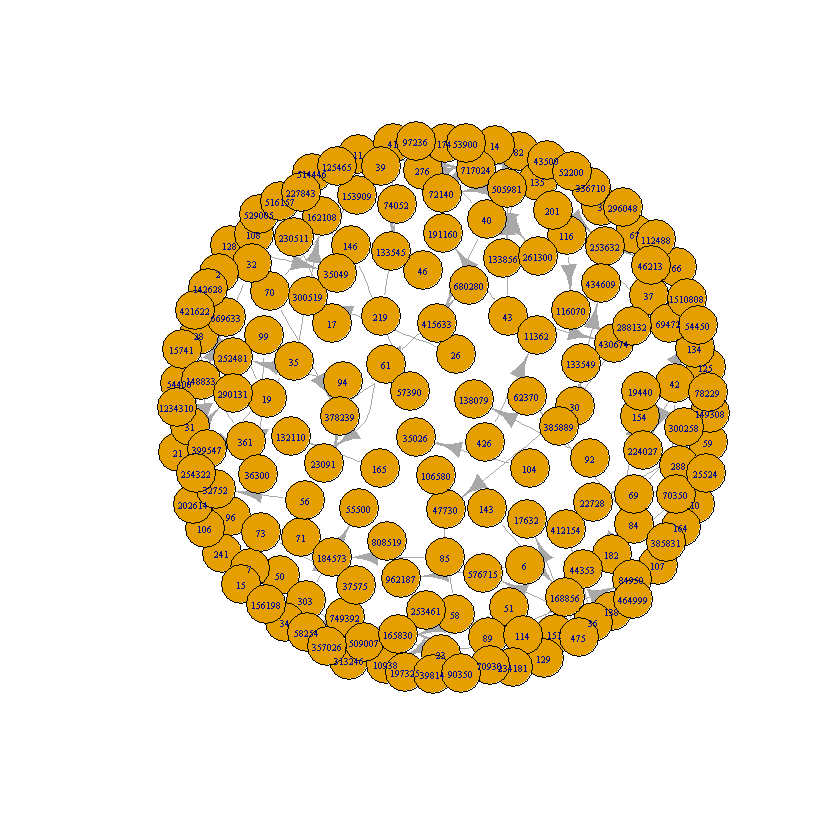

In [90]:
plot(df2, layout=layout_with_kk, vertex.label.cex=0.5)

Here is beauty of the Igraph package. With igraph, a plot can be displayed in various forms which make it more explanatory even to a layman.  

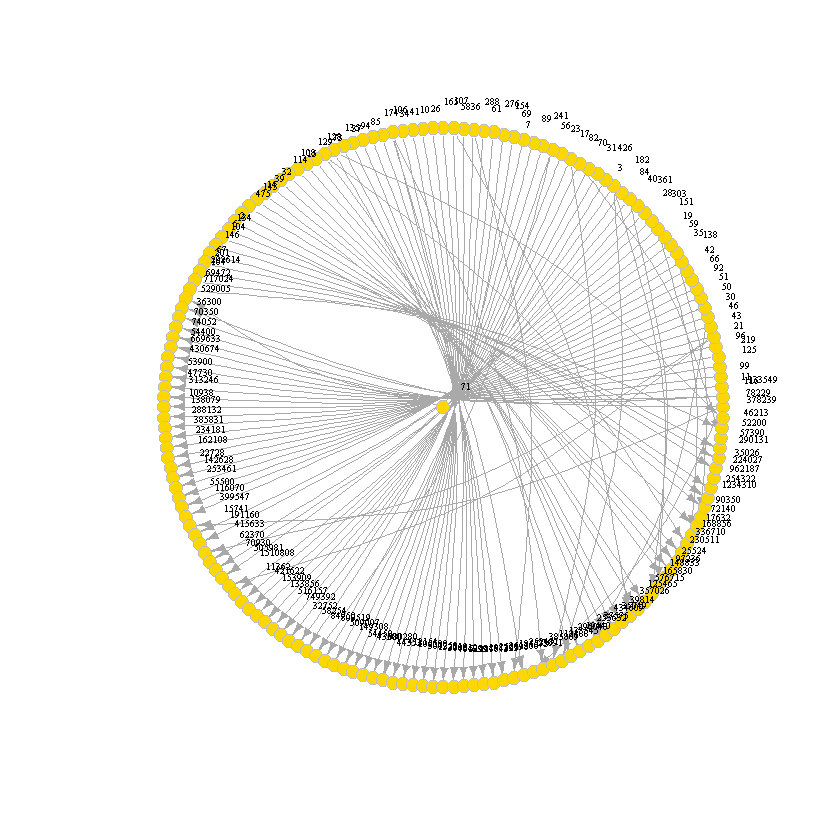

In [91]:
plot(df2, edge.arrow.size=.5, vertex.color="gold", vertex.size=5, layout=layout_as_star,
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=0.5, vertex.label.dist=1, edge.curved=0.2)

In [92]:
df %>% activate(edges)

# A tbl_graph: 1268 nodes and 1000 edges
#
# A directed acyclic multigraph with 272 components
#
# Edge Data: 1,000 x 3 (active)
   from    to    id
  <int> <int> <int>
1     1   299     1
2     2   300     1
3     3   301     1
4     4   302     1
5     5   303     1
6     6   304     1
# ... with 994 more rows
#
# Node Data: 1,268 x 1
   name
  <chr>
1   111
2    49
3   283
# ... with 1,265 more rows

In [93]:
E(df) # Better way to obtain the edges
mean(E(df))

+ 1000/1000 edges (vertex names):
 [1] 111->68150   49 ->110902  283->72020   177->220192  72 ->164951 
 [6] 56 ->22700   48 ->325839  137->171783  152->34400   51 ->441099 
[11] 68 ->474438  156->115098  41 ->514446  20 ->913102  303->55500  
[16] 123->190185  62 ->372300  22 ->886030  101->279330  119->247564 
[21] 139->175425  158->43267   90 ->367113  38 ->336769  12 ->659832 
[26] 47 ->358062  82 ->129111  121->36375   129->83085   207->139524 
[31] 18 ->503145  173->262594  46 ->53900   79 ->426824  26 ->723262 
[36] 6  ->809574  3  ->1510808 236->117606  86 ->54400   8  ->732851 
[41] 182->19440   64 ->101916  150->72523   17 ->1107213 144->12810  
[46] 184->112068  31 ->1195101 226->52110   127->163399  128->59720  
+ ... omitted several edges

[1] 500.5

In [94]:
V(df) # The vertices and it averages
mean(V(df))

+ 1268/1268 vertices, named:
   [1] 111     49      283     177     72      56      48      137     152    
  [10] 51      68      156     41      20      303     123     62      22     
  [19] 101     119     139     158     90      38      12      47      82     
  [28] 121     129     207     18      173     46      79      26      6      
  [37] 3       236     86      8       182     64      150     17      144    
  [46] 184     31      226     127     128     203     134     85      77     
  [55] 88      224     39      96      107     240     28      11      92     
  [64] 155     45      84      175     93      55      29      9       4      
  [73] 103     16      78      399     229     33      261     19      94     
  [82] 24      276     37      162     71      30      52      174     116    
+ ... omitted several vertices

[1] 634.5

* Standard Deviation

 This is used to quantify the amount of variation or dispersion of a set of data values for both nodes and edges.

In [95]:
sd(V(df)) #
sd(E(df))

[1] 366.1844

[1] 288.8194

In [96]:
net <- simplify(df, remove.multiple = F, remove.loops = T) 

edgelist <- as_edgelist(net, names=T)
#as_adjacency_matrix(net, attr="edge")
head(edgelist)

111,68150
49,110902
283,72020
177,220192
72,164951
56,22700


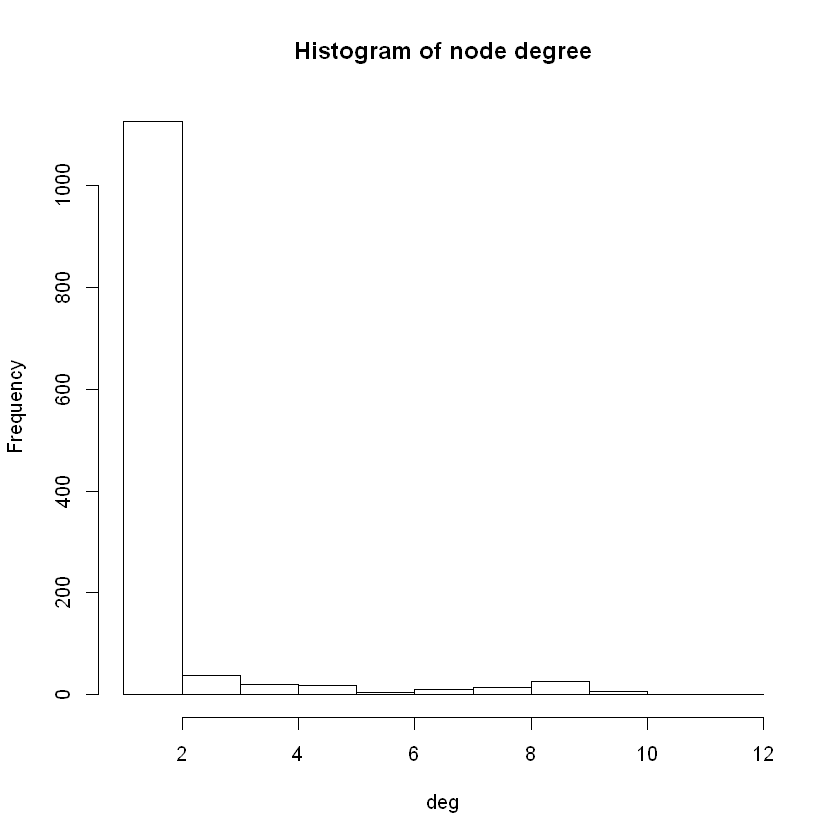

In [97]:
deg <- degree(df, v = V(df), mode = "all")
hist(deg,main="Histogram of node degree",axes = TRUE, plot = TRUE, angle = 45, breaks = "Sturges")

* Degree Centrality is the number of links incident upon a node i.e the number of ties a node has!
$${ C }_{ D }(G)\quad =\quad \frac { \sum _{ i=1 }^{ |v| }{ [{ C }_{ D } } (v*)\quad -\quad { C }_{ D }({ v }_{ i })] }{ H } $$

where H is the maximum value when the graph X is connected to one nodes to which other nodes are connected.

In [98]:
# Degree (number of ties)
summary(degree(df, mode="in"))
summary(centr_degree(df, mode="in", normalized=T))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.7886  1.0000 12.0000 

                Length Class  Mode   
res             1268   -none- numeric
centralization     1   -none- numeric
theoretical_max    1   -none- numeric

* Closeness centrality of a node is the average lenght of the shortest path between the node and all other nodes in the graph. Mathematically expressed as
$$C(x)\quad =\quad \frac { 1 }{ { \Sigma  }_{ y }\quad d(y,x) } $$

where d(y,x) is the distance between vertices x and y.

In [99]:
# Inverse of the node's average geodesic distance to others in the network
summary(closeness(df, mode="all", weights=NA))
summary(centr_clo(df, mode="all", normalized=T))

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
6.229e-07 6.234e-07 6.254e-07 6.260e-07 6.269e-07 6.443e-07 

                Length Class  Mode   
res             1268   -none- numeric
centralization     1   -none- numeric
theoretical_max    1   -none- numeric

* Eigenvector Centrality can be defined as a measure of influence of a node in a network. This is done by assigning the relatives scores to all nodes in the network based on concept that connections high-scoring nodes would contribute more to it lower counterpart. Express mathematically (after several mathematical manipulation) as 
$$AX=\lambda X$$ 

In [100]:
# Values of the first eigenvector of the graph adjacency matrix
eigen_centrality(df, directed=T, weights=NA)
summary(centr_eigen(df, directed=T, normalized=T)) 


$vector
    111      49     283     177      72      56      48     137     152      51 
      0       0       0       0       0       0       0       0       0       0 
     68     156      41      20     303     123      62      22     101     119 
      0       0       0       0       0       0       0       0       0       0 
    139     158      90      38      12      47      82     121     129     207 
      0       0       0       0       0       0       0       0       0       0 
     18     173      46      79      26       6       3     236      86       8 
      0       0       0       0       0       0       0       0       0       0 
    182      64     150      17     144     184      31     226     127     128 
      0       0       0       0       0       0       0       0       0       0 
    203     134      85      77      88     224      39      96     107     240 
      0       0       0       0       0       0       0       0       0       0 
     28      11      92     155      45      84     175      93      55      29 
      0       0       0       0       0       0       0       0       0       0 
      9       4     103      16      78     399     229      33     261      19 
      0       0       0       0       0       0       0       0       0       0 
     94      24     276      37     162      71      30      52     174     116 
      0       0       0       0       0       0       0       0       0       0 
    190     131       7      40     104      35      69      66      53       2 
      0       0       0       0       0       0       0       0       0       0 
     65     231      57      34     180     140      15       5     153      21 
      0       0       0       0       0       0       0       0       0       0 
     97     110      54      95      42      74     132      76      61      27 
      0       0       0       0       0       0       0       0       0       0 
     50      87     118      63      14      13     130      36      23      44 
      0       0       0       0       0       0       0       0       0       0 
     43     112      10     178      81      99     133      25     147      67 
      0       0       0       0       0       0       0       0       0       0 
     70      91     299     136     117     264     143     142      73     100 
      0       0       0       0       0       0       0       0       0       0 
    106     200     183     265     172     154     135      75     120     214 
      0       0       0       0       0       0       0       0       0       0 
     32     373     138      98     164     192     151     274     228      89 
      0       0       0       0       0       0       0       0       0       0 
    234     428      58     167     125     194     165     258     273     209 
      0       0       0       0       0       0       0       0       0       0 
    114     251      60     490     219     213     388     113     220     317 
      0       0       0       0       0       0       0       0       0       0 
    290     361     124     254     202     277     105     181     241     108 
      0       0       0       0       0       0       0       0       0       0 
    163      59     440     280     284     256     255     378     168     215 
      0       0       0       0       0       0       0       0       0       0 
    148     259     145     352     369      83      80     161     176     311 
      0       0       0       0       0       0       0       0       0       0 
    126     186     297     221     448     252     122     295     270     201 
      0       0       0       0       0       0       0       0       0       0 
    421     398     344     329     439     470     475     199     465     486 
      0       0       0       0       0       0       0       0       0       0 
    460     322     238     316     389     385     377     340     409     187 
      0       0       0

                Length Class  Mode   
vector          1268   -none- numeric
value              1   -none- numeric
options           20   -none- list   
centralization     1   -none- numeric
theoretical_max    1   -none- numeric


* Betweencess Centrality is a central measure of a vertex within the graph i.e to measure Number of geodesics that pass through the node or the edge. Express mathematically as 

$${ C }_{ B }(v)\quad =\sum _{ s\neq v\neq t\in V }^{  }{ \frac { { \sigma  }_{ st }(v) }{ { \sigma  }_{ st } }  } $$


Where,

$${ \sigma  }_{ st }$$ 
is the total number of shortest paths from nodes s to node t and 
$${ \sigma  }_{ st }(v)$$ 
is the number of those path that pass through v.

In [101]:

mean(edge_betweenness(df, directed=T, weights=NA)) # The average number of betweenness

[1] 1.038

In [102]:
mean_distance(df, directed=F)

[1] 2.171722

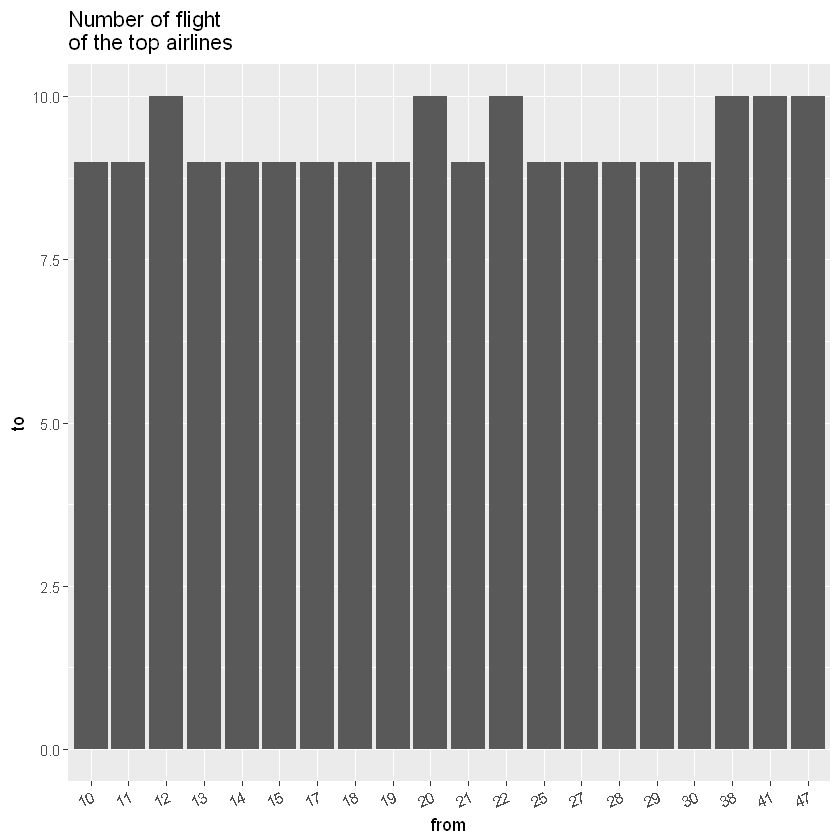

In [103]:
suppressMessages(library(recommenderlab))

df_RRM <- as(airport, "realRatingMatrix")


flight_per_airline <- colCounts(df_RRM)

table_views <- data.frame(
from = names(flight_per_airline),
to = flight_per_airline
)
table_views <- table_views[order(table_views$to, decreasing =
TRUE), ]

ggplot(table_views[1:20, ], aes(x = from, y = to), col="blue") +
geom_bar(stat="identity") + theme(axis.text.x =
element_text(angle = 25, hjust = 1)) + ggtitle("Number of flight
of the top airlines")

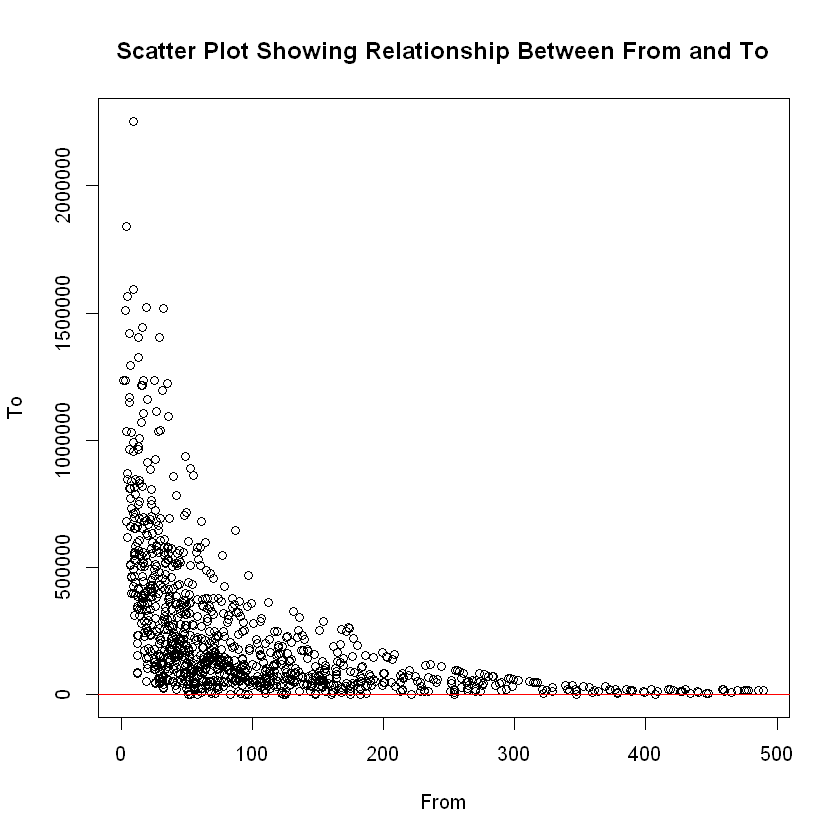

In [104]:
plot(airport$from, airport$to, main = "Scatter Plot Showing Relationship Between From and To", xlab = "From", ylab = "To")
abline(lm(airport$from~airport$to), col = "red")

* Correlation Coefficient

This is used to test the relationship between two or more variables in statistics.

In [105]:
cor.test(airport$from, airport$to, method = c("pearson", "kendall", "spearman"),
         exact = NULL, conf.level = 0.95, continuity = FALSE)


	Pearson's product-moment correlation

data:  airport$from and airport$to
t = -17.567, df = 998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5319498 -0.4371606
sample estimates:
       cor 
-0.4859831 


The above correlation is -0.4859831, meaning their is negative relatioship between the two variables (From, To).

* Regression Analysis

Having obtain a negative correlation between the two variables, we will now dig deeper by doing more statictical analysis that tells us the degree of relationship between them. 

# Test of Hypothesis

Null Hypothesis:

$${ H }_{ 0 }\quad :\quad { \mu  }_{ 1 }\quad =\quad { \mu  }_{ 2 }\quad =\quad { \mu  }_{ 3 }\quad .\quad .\quad .\quad =\quad { \mu  }_{ n }$$

for n levels of an experimental treatment.

$$Against$$

Alternative Hypothesis:

$${ H }_{ 1 }\quad :\quad { \mu  }_{ 1 }\quad \neq \quad { \mu  }_{ 2 }\quad =\quad { \mu  }_{ 3 }\quad .\quad .\quad .\quad =\quad { \mu  }_{ n }$$




* Decision

Reject Ho if P-value is less than tabulated value at ($${\alpha}$$ = 0.05), otherwise do not reject.

In [106]:
from_to <- lm(from ~ to, data=airport)

summary.lm(from_to)


Call:
lm(formula = from ~ to, data = airport)

Residuals:
    Min      1Q  Median      3Q     Max 
-118.46  -58.63  -23.19   28.35  348.55 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.441e+02  3.606e+00   39.95   <2e-16 ***
to          -1.669e-04  9.499e-06  -17.57   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 86.95 on 998 degrees of freedom
Multiple R-squared:  0.2362,	Adjusted R-squared:  0.2354 
F-statistic: 308.6 on 1 and 998 DF,  p-value: < 2.2e-16


In [107]:
anova(from_to, test= "F")

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
to,1,2333023,2333023.261,308.5898,2.122782e-60
Residuals,998,7545154,7560.274,NA,NA


In [108]:
confint(from_to)

,2.5 %,97.5 %
(Intercept),1.369804e+02,1.511322e+02
to,-1.855012e-04,-1.482217e-04


# Conclusion:

Since the P-value 2.2e-16 is less than the tabulated value of 0.05, we therefore reject Ho and accept H1. We then conclude that the treatment means are not all equal. And with our expected value laying between non-zero confident interval, we are 95 % confident of the analysis.